# Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
pd.options.mode.chained_assignment = None

Access to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CMF/stock_data.csv')

In [ ]:
data.head()

,date,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
0,2005-01-04,sh600000,0.77,0.77,0.75,0.76,3808939.0,900000000.0,0.004232,17.1990,14.4219,2.0777,3.1439,2.2097,6.9549,6.9549,2693520.0,8.895254
1,2005-01-05,sh600000,0.76,0.76,0.74,0.75,5225244.0,900000000.0,0.005806,16.9240,14.1913,2.0445,3.0937,2.1744,7.0679,7.0679,2650455.0,8.895254
2,2005-01-06,sh600000,0.75,0.75,0.73,0.74,4298099.0,900000000.0,0.004776,16.6991,14.0026,2.0173,3.0525,2.1455,7.1632,7.1632,2615220.0,8.895254
3,2005-01-07,sh600000,0.74,0.75,0.73,0.74,4362864.0,900000000.0,0.004848,16.7491,14.0446,2.0233,3.0617,2.1519,7.1418,7.1418,2623050.0,8.895254
4,2005-01-10,sh600000,0.75,0.77,0.74,0.77,7115260.0,900000000.0,0.007906,17.3240,14.0575,2.0082,3.1668,2.2258,6.9048,6.9048,2713095.0,8.895254


Make sure that all the data is in the correct format

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129344 entries, 0 to 10129343
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   ticker             object 
 2   open               float64
 3   high               float64
 4   low                float64
 5   close              float64
 6   volume             float64
 7   outstanding_share  float64
 8   turnover           float64
 9   pe                 float64
 10  pe_ttm             float64
 11  pb                 float64
 12  ps                 float64
 13  ps_ttm             float64
 14  dv_ratio           float64
 15  dv_ttm             float64
 16  total_mv           float64
 17  qfq_factor         float64
dtypes: float64(16), object(2)
memory usage: 1.4+ GB


In [ ]:
data.shape

(10129344, 18)

In the future, we will need the closing price of the shares without adjustment. Let's change the data in the corresponding column.

In [ ]:
data['close'] = data['close'] * data['qfq_factor']
data.head()

,date,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
0,2005-01-04,sh600000,0.77,0.77,0.75,6.760393,3808939.0,900000000.0,0.004232,17.1990,14.4219,2.0777,3.1439,2.2097,6.9549,6.9549,2693520.0,8.895254
1,2005-01-05,sh600000,0.76,0.76,0.74,6.671440,5225244.0,900000000.0,0.005806,16.9240,14.1913,2.0445,3.0937,2.1744,7.0679,7.0679,2650455.0,8.895254
2,2005-01-06,sh600000,0.75,0.75,0.73,6.582488,4298099.0,900000000.0,0.004776,16.6991,14.0026,2.0173,3.0525,2.1455,7.1632,7.1632,2615220.0,8.895254
3,2005-01-07,sh600000,0.74,0.75,0.73,6.582488,4362864.0,900000000.0,0.004848,16.7491,14.0446,2.0233,3.0617,2.1519,7.1418,7.1418,2623050.0,8.895254
4,2005-01-10,sh600000,0.75,0.77,0.74,6.849346,7115260.0,900000000.0,0.007906,17.3240,14.0575,2.0082,3.1668,2.2258,6.9048,6.9048,2713095.0,8.895254


Let's set the date as an index for future charts.

In [ ]:
data.set_index('date', inplace = True)
data.head()

,ticker,open,high,low,close,volume,outstanding_share,turnover,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_mv,qfq_factor
date,,,,,,,,,,,,,,,,,
2005-01-04,sh600000,0.77,0.77,0.75,6.760393,3808939.0,900000000.0,0.004232,17.1990,14.4219,2.0777,3.1439,2.2097,6.9549,6.9549,2693520.0,8.895254
2005-01-05,sh600000,0.76,0.76,0.74,6.671440,5225244.0,900000000.0,0.005806,16.9240,14.1913,2.0445,3.0937,2.1744,7.0679,7.0679,2650455.0,8.895254
2005-01-06,sh600000,0.75,0.75,0.73,6.582488,4298099.0,900000000.0,0.004776,16.6991,14.0026,2.0173,3.0525,2.1455,7.1632,7.1632,2615220.0,8.895254
2005-01-07,sh600000,0.74,0.75,0.73,6.582488,4362864.0,900000000.0,0.004848,16.7491,14.0446,2.0233,3.0617,2.1519,7.1418,7.1418,2623050.0,8.895254
2005-01-10,sh600000,0.75,0.77,0.74,6.849346,7115260.0,900000000.0,0.007906,17.3240,14.0575,2.0082,3.1668,2.2258,6.9048,6.9048,2713095.0,8.895254


Now we will delete all columns except the stock and the closing price

In [ ]:
data = data[['ticker', 'close']]
data.head()

,ticker,close
date,,
2005-01-04,sh600000,6.760393
2005-01-05,sh600000,6.671440
2005-01-06,sh600000,6.582488
2005-01-07,sh600000,6.582488
2005-01-10,sh600000,6.849346


**Let's see how the prices of the first 20 companies change.**

  0%|          | 0/5 [00:00<?, ?it/s]

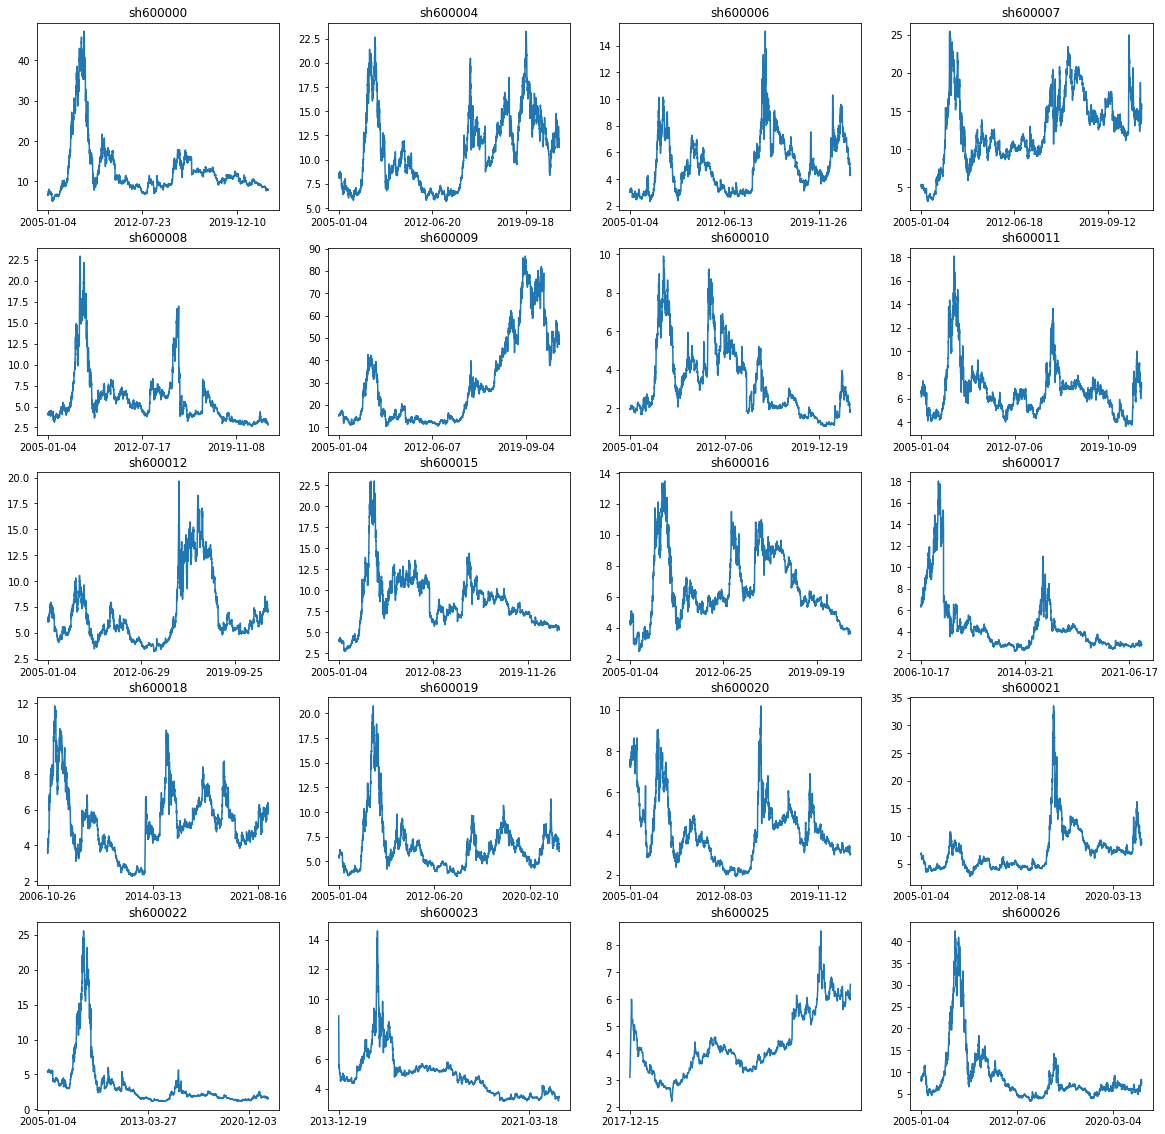

In [ ]:
plt.rcParams["figure.figsize"] = (20, 20)
first20_company = np.unique(data['ticker'])[:20].reshape((5, 4))
fig, axes = plt.subplots(5, 4)
for i in tqdm(range(5)):
  for j in range(4):
    df = data[data['ticker'] == first20_company[i, j]]
    axes[i, j].plot(df.index, df['close'])
    axes[i, j].set_title(first20_company[i, j])
    axes[i, j].xaxis.set_major_locator(ticker.MultipleLocator(252 * 7))
plt.show()

The first companies have quite similar behavior: there are high ups and downs, just different frequency.

The first stock has clear trends and several sideways, this is good for the future algorithm: you need to learn how to catch trends and not lose a lot in the sideways.
Let's take it as an action with which we will work. At the end, we will see the result of the final strategy on other stocks.

We will use data from 2005 onwards to catch the biggest trends.

Let's create a separate dataframe for the first promotion.

In [ ]:
df_sh600000 = data[data['ticker'] == 'sh600000'].drop(columns=['ticker'], axis=1)
df_sh600000

,close
date,
2005-01-04,6.760393
2005-01-05,6.671440
2005-01-06,6.582488
2005-01-07,6.582488
2005-01-10,6.849346
...,...
2022-05-05,7.990000
2022-05-06,7.850000
2022-05-09,7.820000


# Auxiliary functions

Functions to get year and year with month

In [ ]:
def take_year(date):
  return date[:4]

def take_YearAndMonth(date):
  return date[:7]
n_take_year = np.vectorize(take_year)
n_take_YearAndMonth = np.vectorize(take_YearAndMonth)

**Indicators for backtest**

In [ ]:
def sharpe_ratio(return_series, N, rf):
  mean = return_series.mean() * N - rf
  sigma = return_series.std() * np.sqrt(N)
  return mean / sigma

def max_drawdown(return_series):
  comp_ret = (return_series + 1).cumprod()
  peak = comp_ret.expanding(min_periods = 1).max()
  dd = (comp_ret / peak) - 1
  return dd.min()

def profitability(return_series, N):
  profitability = return_series.iloc[-1] / return_series.iloc[0] - 1
  tenor = len(return_series) / N
  return profitability / tenor

**Backtest** for the moving average

name - the name of the strategy

part - the share of the current account balance used to purchase shares.

In [ ]:
def BackTest(name: str, strategy: pd.DataFrame, data: pd.DataFrame,
             buying_points: np.ndarray, selling_points: np.ndarray, info=False, part=1,
             risk_managment=False, window=True):
  account = 10000
  stocks = 0
  diver_stocks = 0
  first_max = 0
  index_first_max = 0
  second_max = 0
  stop_loss = 0
  account_history = np.empty(len(data))
  account_history[0] = account
  for index in range(1, len(data)):
    close_price = data.iloc[index].close

    if index in buying_points:
      if risk_managment and index not in np.where(np.isnan(data['MACD histogram']))[0]:
        # great value, most likely the trend is ending
        if abs(data['MACD histogram'][index]) > 0.3:
          part = 0.3
        elif  0.2 <= abs(data['MACD histogram'][index]) <= 0.3:
          part = 0.6
        elif 0.1 <= abs(data['MACD histogram'][index]) <= 0.2:
          part = 1
        else:
          # the values are small, but the histogram is growing
          if abs(data['MACD histogram'][index]) > abs(data['MACD histogram'][index - 1]):
            part = 0.7
          else:
            part = 0.3
      account += stocks * close_price
      stocks = 0
      stocks += (account * part) // close_price
      account -= stocks * close_price
    elif index in selling_points:
      account += stocks * close_price
      stocks = 0
      if risk_managment and index not in np.where(np.isnan(data['MACD histogram']))[0]:
        # great value, most likely the trend is ending
        if abs(data['MACD histogram'][index]) > 0.3:
          part = 0.3
        elif  0.2 <= abs(data['MACD histogram'][index]) <= 0.3:
          part = 0.6
        elif 0.1 <= abs(data['MACD histogram'][index]) <= 0.2:
          part = 1
        else:
          # the values are small, but the histogram is growing
          if abs(data['MACD histogram'][index]) < abs(data['MACD histogram'][index - 1]):
            part = 0.7
          else:
            part = 0.3
      stocks -= (account * part) // close_price
      account -= stocks * close_price
    account_history[index] = account + stocks * close_price + diver_stocks * close_price
  res = pd.DataFrame(account_history, index = data.index, columns = ['account'])

  N = 252 # number of days
  rf = 0.0 # risk-free rate

  pct = res['account'].pct_change().dropna()
  sharpes = sharpe_ratio(pct, N, rf)
  max_drawdowns = max_drawdown(pct)
  profit = profitability(res['account'], N)

  if info:
    print(f"sharpes: {sharpes}\nmax_drawdowns: {max_drawdowns}\nprofitability: {profit}\nprofitability/max_drawdowns: {profit / max_drawdowns}")

  d = {}
  d['name'] = name
  if window:
    d['fast_window'] = data.columns[1][2:]
    d['slow_window'] = data.columns[2][2:]
  d['sharpes'] = sharpes
  d['max_drawdowns'] = max_drawdowns
  d['profitability'] = profit
  d['profitability/max_drawdowns'] = profit / max_drawdowns
  strategy = strategy.append(d, ignore_index = True)
  return strategy, res

Training and test samples for stock stock.

name - the name of the strategy (SMA/EMA)

In [ ]:
def train(stock: pd.DataFrame, fast_window: int, slow_window: int, name: str) -> pd.DataFrame:
  first_2005 = np.where(n_take_year(np.array(stock.index)) == '2005')[0][0]
  last_2020 =  np.where(n_take_year(np.array(stock.index)) == '2020')[0][-1]
  df = stock.iloc[first_2005:last_2020 + 1]
  df[f"{fast_window}_{name}"] = eval(name)(np.array(stock['close']), fast_window, first_2005, last_2020 + 1)
  df[f"{slow_window}_{name}"] = eval(name)(np.array(stock['close']), slow_window, first_2005, last_2020 + 1)
  # Добавим сигналы и найдем точки покупки/продажи
  df[f"signal_{name}"] = np.where(df[f"{fast_window}_{name}"] > df[f"{slow_window}_{name}"], 1.0, 0.0)
  df[f"position_{name}"] = df[f"signal_{name}"].diff()
  return df

def test(stock: pd.DataFrame, fast_window: int, slow_window: int, name: str) -> pd.DataFrame:
  indexes_2021 = np.where(n_take_year(np.array(stock.index)) == '2021')[0]
  first_2021 = indexes_2021[0]
  last_2021 =  indexes_2021[-1]
  df = stock.iloc[first_2021:last_2021 + 1]
  df[f"{fast_window}_{name}"] = eval(name)(np.array(stock['close']), fast_window, first_2021, last_2021 + 1)
  df[f"{slow_window}_{name}"] = eval(name)(np.array(stock['close']), slow_window, first_2021, last_2021 + 1)
  # Добавим сигналы и найдем точки покупки/продажи
  df[f"signal_{name}"] = np.where(df[f"{fast_window}_{name}"] > df[f"{slow_window}_{name}"], 1.0, 0.0)
  df[f"position_{name}"] = df[f"signal_{name}"].diff()
  return df

Charts of the account status, closing prices and moving averages

In [ ]:
def plot_res(res, stock, step_date=252):
  fig, ax1 = plt.subplots(figsize = (20, 10))
  ax2 = ax1.twinx()
  ax1.plot(res.index, res['account'], color = 'green')
  ax2.plot(res.index, stock.iloc[:, 1], color = 'blue', label = stock.columns[1])
  ax2.plot(res.index, stock.iloc[:, 2], color = 'yellow', label = stock.columns[2])
  ax2.plot(res.index, stock['close'], color =   'black')
  ax1.xaxis.set_major_locator(ticker.MultipleLocator(step_date))
  ax2.xaxis.set_major_locator(ticker.MultipleLocator(step_date))
  ax1.set_xlabel('date')
  ax1.set_ylabel('account', color = 'green')
  ax2.set_ylabel('close price', color = 'black')
  plt.legend()
  plt.show()

# SMA

In [ ]:
# start and end - indexes of the first and last date (end - not inclusive)
def SMA(input: np.ndarray, window: int, start: int, end: int) -> np.array:
  output = np.empty(end - start)
  # if there is a NaN at the beginning
  nans = np.count_nonzero(np.isnan(input))
  shift = 0
  if start - window + 1 < nans:
    for i in range(nans + window - 1):
      output[i] = np.nan
    shift = nans + window - 1
    start = nans + window - 1
  summ = np.sum(input[start - window + 1:start + 1])
  output[shift] =  summ / window
  for i in range(start + 1, end):
    summ = summ - input[i - window] + input[i]
    output[i - start + shift] = summ / window
  return output

A table with all future strategies

In [ ]:
strategy = pd.DataFrame(columns = ['name', 'fast_window', 'slow_window', 'sharpes', 'max_drawdowns', 'profitability', 'profitability/max_drawdowns'])

sharpes: 0.19124637033536376
max_drawdowns: -0.8876789979395246
profitability: 0.005154195086451305
profitability/max_drawdowns: -0.005806372684737605


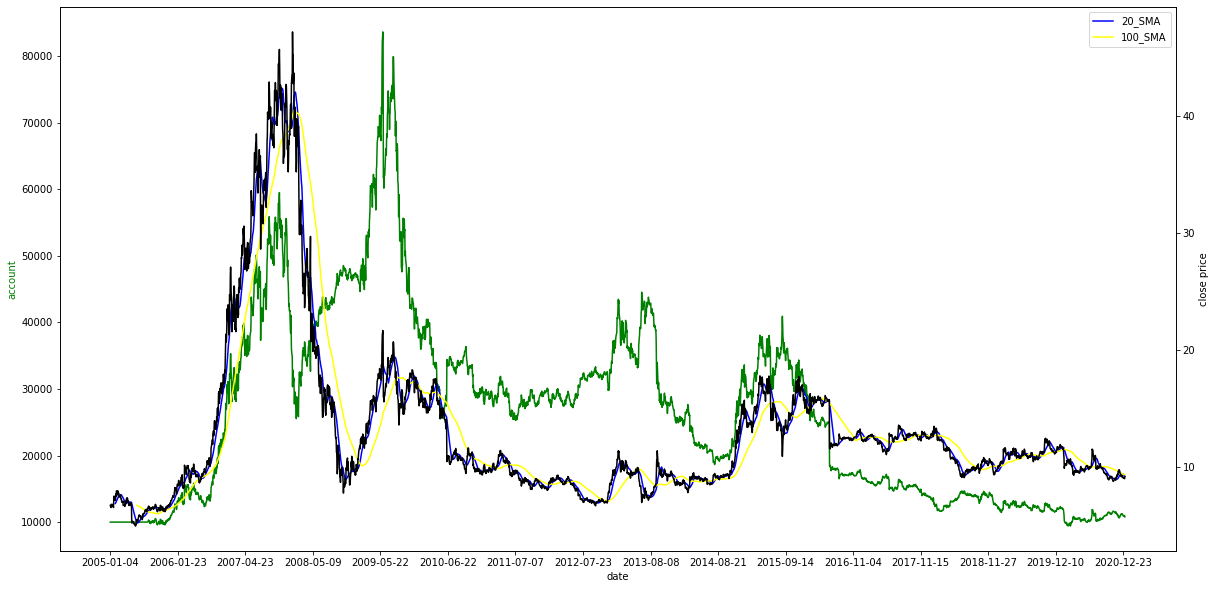

In [ ]:
df_train = train(df_sh600000, 20, 100, 'SMA')
buying_points = np.where(df_train['position_SMA'] == 1.0)[0]
selling_points = np.where(df_train['position_SMA'] == -1.0)[0]
strategy, res = BackTest('SMA', strategy, df_train, buying_points, selling_points, info = True)
plot_res(res, df_train)

In [ ]:
fast_window = np.arange(10, 40)
slow_window = np.arange(40, 150)
for i in tqdm(range(len(fast_window))):
  for j in range(len(slow_window)):
    df_train = train(df_sh600000, fast_window[i], slow_window[j], 'SMA')
    buying_points = np.where(df_train['position_SMA'] == 1.0)[0]
    selling_points = np.where(df_train['position_SMA'] == -1.0)[0]
    strategy, res = BackTest('SMA', strategy, df_train, buying_points, selling_points)
strategy

  0%|          | 0/30 [00:00<?, ?it/s]

,name,fast_window,slow_window,sharpes,max_drawdowns,profitability,profitability/max_drawdowns
0,SMA,_SMA,0_SMA,0.191246,-0.887679,0.005154,-0.005806
1,SMA,_SMA,_SMA,0.247345,-0.711092,0.027293,-0.038382
2,SMA,_SMA,_SMA,0.274521,-0.658327,0.042490,-0.064543
3,SMA,_SMA,_SMA,0.295083,-0.700427,0.055702,-0.079525
4,SMA,_SMA,_SMA,0.324461,-0.633827,0.077266,-0.121904
...,...,...,...,...,...,...,...
3296,SMA,_SMA,5_SMA,0.287679,-0.869440,0.050591,-0.058189
3297,SMA,_SMA,6_SMA,0.330579,-0.833205,0.083102,-0.099737
3298,SMA,_SMA,7_SMA,0.358264,-0.826172,0.107750,-0.130421
3299,SMA,_SMA,8_SMA,0.341115,-0.842902,0.091998,-0.109144


In [ ]:
strategy[strategy['sharpes'] == strategy['sharpes'].max()]

,name,fast_window,slow_window,sharpes,max_drawdowns,profitability,profitability/max_drawdowns
3214,SMA,_SMA,_SMA,0.648269,-0.541286,0.795515,-1.469675


sharpes: 0.6482694793284577
max_drawdowns: -0.5412864452487627
profitability: 0.795515282243163
profitability/max_drawdowns: -1.4696752324502838


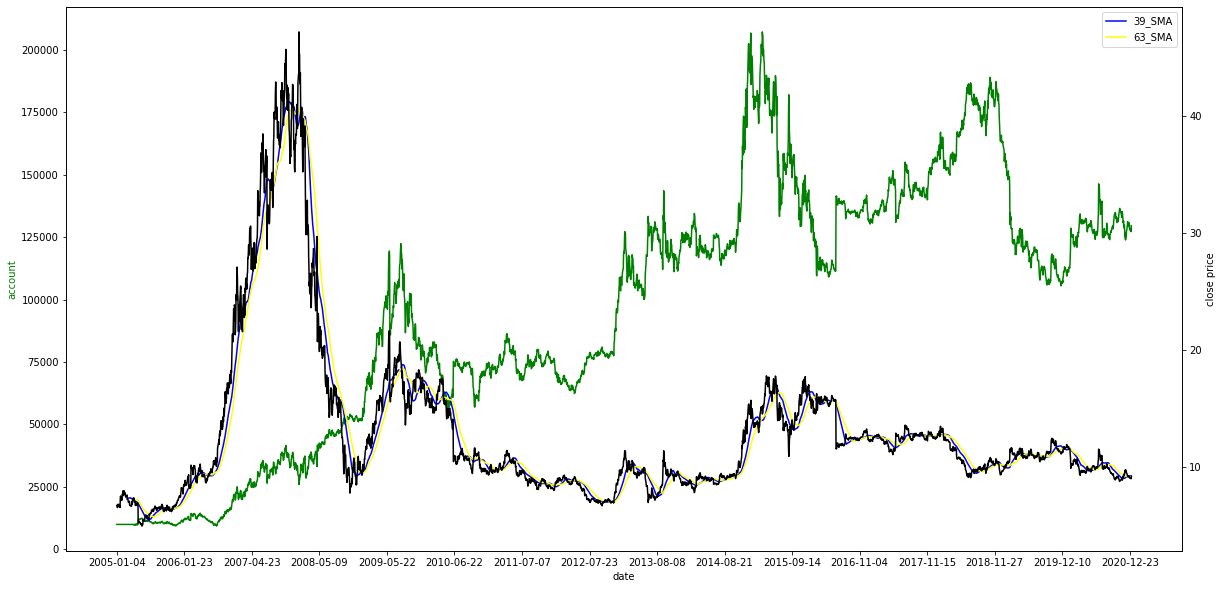

In [ ]:
df_train = train(df_sh600000, 39, 63, 'SMA')
buying_points = np.where(df_train['position_SMA'] == 1.0)[0]
selling_points = np.where(df_train['position_SMA'] == -1.0)[0]
strategy, res = BackTest('SMA', strategy, df_train, buying_points, selling_points, info = True)
plot_res(res, df_train)

The best parameters:

SMA 39 63 0.648269 -0.541286 0.795515 -1.469675

It is quite possible that the parameters have adjusted to the data and the result on the test will be completely different

**Results of the best parameters in the test sample**

sharpes: -0.08278124029621543
max_drawdowns: -0.14799600000000024
profitability: -0.025212444444443982
profitability/max_drawdowns: 0.1703589586505307


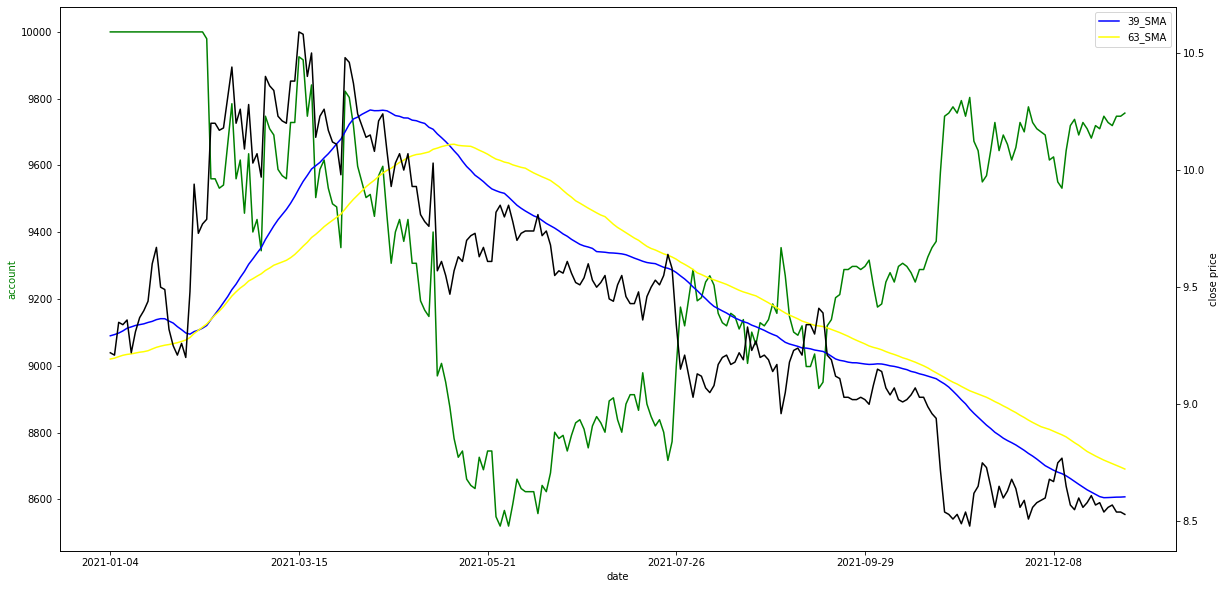

In [ ]:
df_test = test(df_sh600000, 39, 63, 'SMA')
buying_points = np.where(df_test['position_SMA'] == 1.0)[0]
selling_points = np.where(df_test['position_SMA'] == -1.0)[0]
strategy, res = BackTest('SMA', strategy, df_test, buying_points, selling_points, info = True)
plot_res(res, df_test, 45)

Let's try to catch trends using an exponential moving average, as it should react faster.

# EMA

In [ ]:
def EMA(input: np.ndarray, window: int, start: int, end: int) -> np.ndarray:
  output = SMA(input, window, start, end)
  multiplier = 2 / (window + 1)
  for i in range(np.count_nonzero(np.isnan(output)) + 1, end - start):
    output[i] = input[i + start] * multiplier + (1 - multiplier) * output[i - 1]
  return output



sharpes: 0.1785827661511061
max_drawdowns: -0.7501052947299525
profitability: -0.0004367225976256305
profitability/max_drawdowns: 0.0005822150579311086


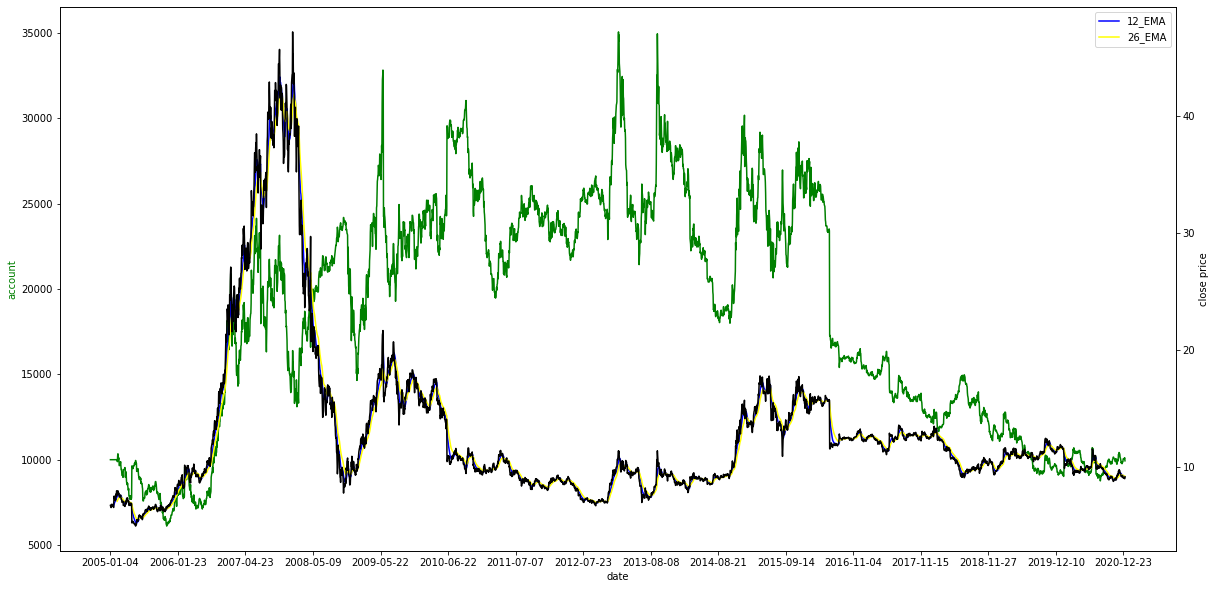

In [ ]:
df_train = train(df_sh600000, 12, 26, 'EMA')
buying_points = np.where(df_train['position_EMA'] == 1.0)[0]
selling_points = np.where(df_train['position_EMA'] == -1.0)[0]
strategy, res = BackTest('EMA', strategy, df_train, buying_points, selling_points, info = True)
plot_res(res, df_train)

sharpes: 0.08676489270906078
max_drawdowns: -0.14156799999999992
profitability: 0.00034014814814825806
profitability/max_drawdowns: -0.0024027191748718516


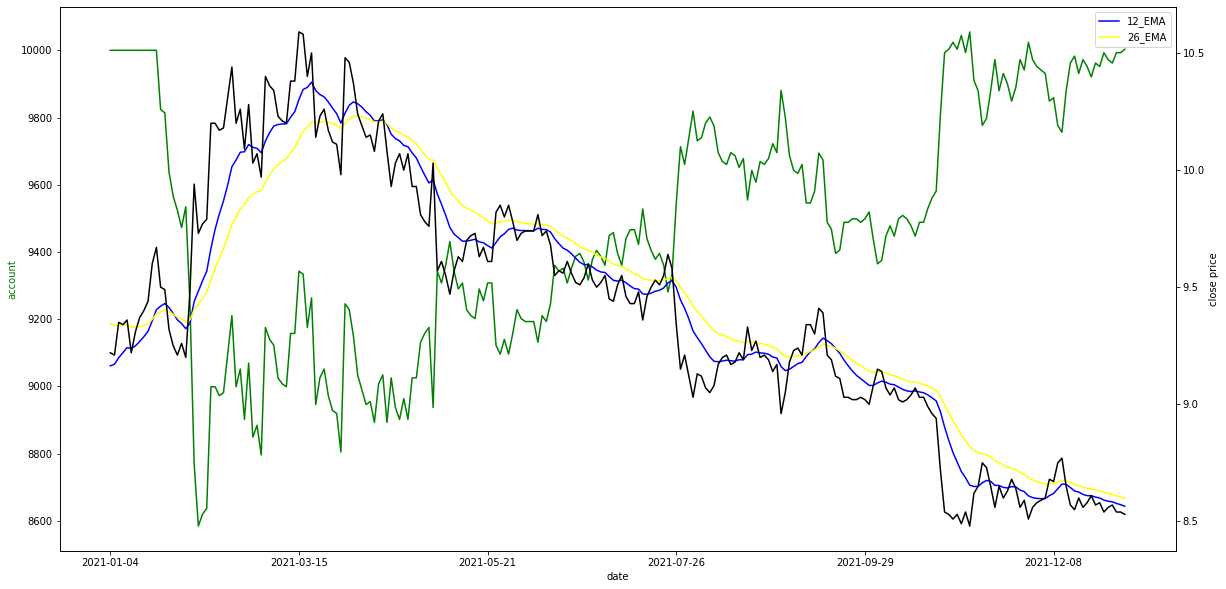

In [ ]:
df_test = test(df_sh600000, 12, 26, 'EMA')
buying_points = np.where(df_test['position_EMA'] == 1.0)[0]
selling_points = np.where(df_test['position_EMA'] == -1.0)[0]
strategy, res = BackTest('EMA', strategy, df_test, buying_points, selling_points, info = True)
plot_res(res, df_test, 45)

We lose it in the sidewalls.

# MACD

In [ ]:
def MACD(fast_ema: np.ndarray, slow_ema: np.ndarray):
  macd = fast_ema - slow_ema
  # for smoothing to get rid of random fluctuations
  signal = EMA(macd, 9, 0, len(macd))
  return macd, signal

In [ ]:
def plot_MACD(data: pd.DataFrame, step_date=252):
  fig, ax = plt.subplots(figsize = (20, 10))
  ax.bar(data.index, data['MACD histogram'], color = 'grey')
  ax.plot(data.index, data['MACD'], color = 'pink', label = 'MACD')
  ax.plot(data.index, data['MACD signal'], color = 'purple', label = 'MACD signal')
  ax.xaxis.set_major_locator(ticker.MultipleLocator(step_date))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
  plt.legend()
  plt.grid()
  plt.show()

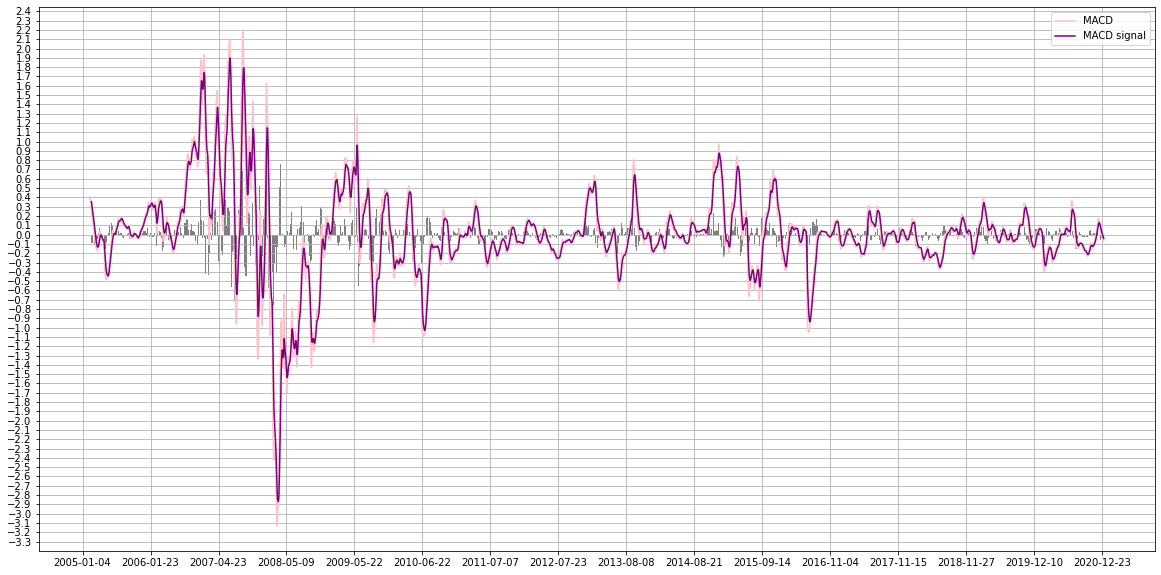

In [ ]:
df_train['MACD'], df_train['MACD signal'] = MACD(np.array(df_train['12_EMA']),np.array(df_train['26_EMA']))
df_train['MACD histogram'] = df_train['MACD'] - df_train['MACD signal']
plot_MACD(df_train)

# Risk management

Let's try to use the values of the MACD histogram as an indicator of trend stability.

sharpes: 0.1692147855869828
max_drawdowns: -0.525928130294284
profitability: 0.01322315980599783
profitability/max_drawdowns: -0.025142522417651986


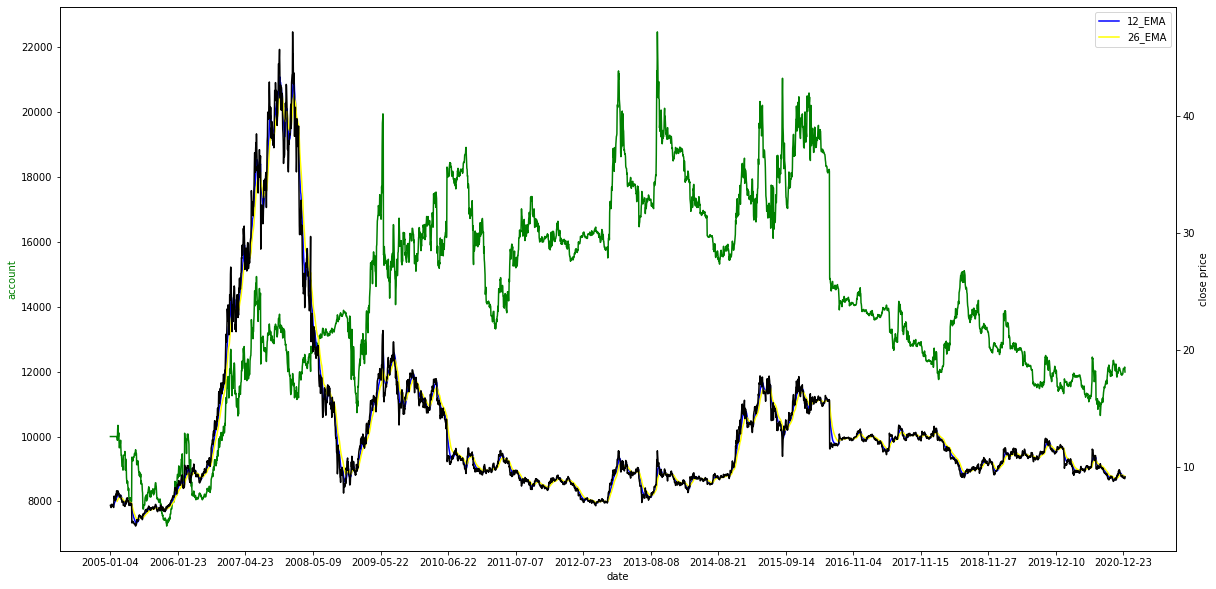

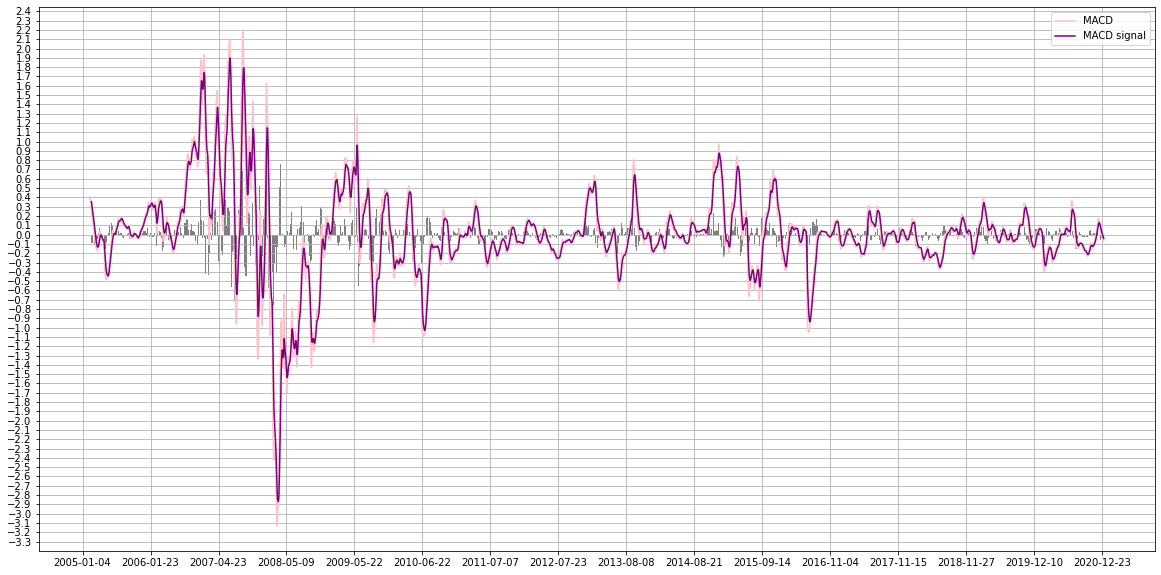

In [ ]:
df_train = train(df_sh600000, 12, 26, 'EMA')
buying_points = np.where(df_train['position_EMA'] == 1.0)[0]
selling_points = np.where(df_train['position_EMA'] == -1.0)[0]
df_train['MACD'], df_train['MACD signal'] = MACD(np.array(df_train['12_EMA']),np.array(df_train['26_EMA']))
df_train['MACD histogram'] = df_train['MACD'] - df_train['MACD signal']
strategy, res = BackTest('EMA + risk managment', strategy, df_train, buying_points, selling_points, info = True, risk_managment = True)
plot_res(res, df_train)
plot_MACD(df_train)

sharpes: -0.14461264387216313
max_drawdowns: -0.1003429999999993
profitability: -0.020178666666666525
profitability/max_drawdowns: 0.20109690428496924


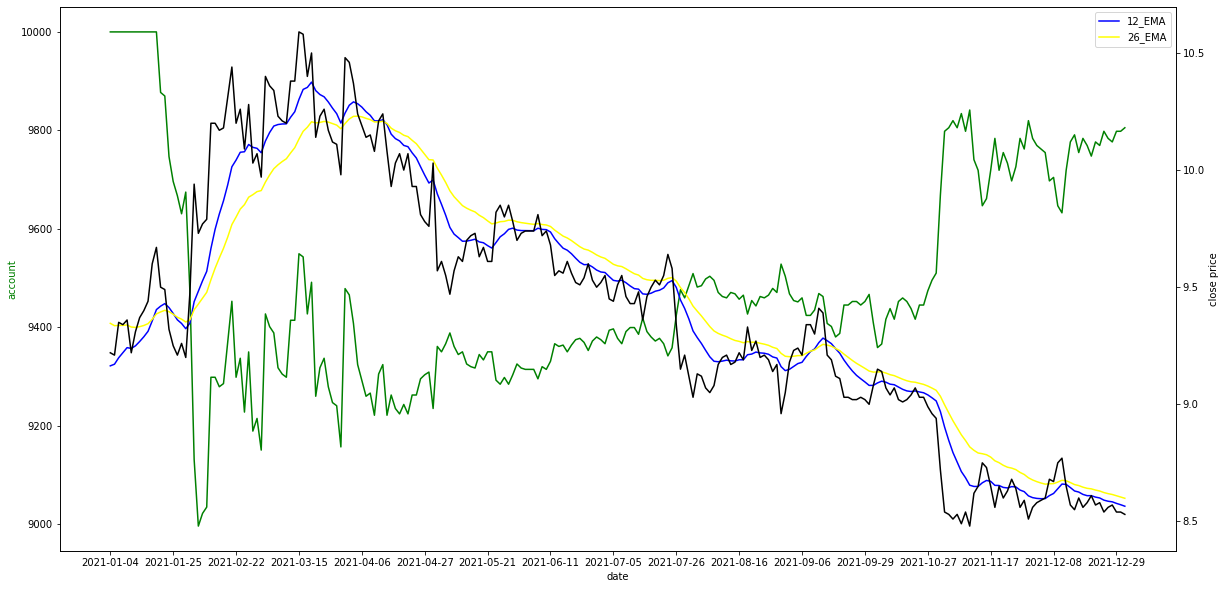

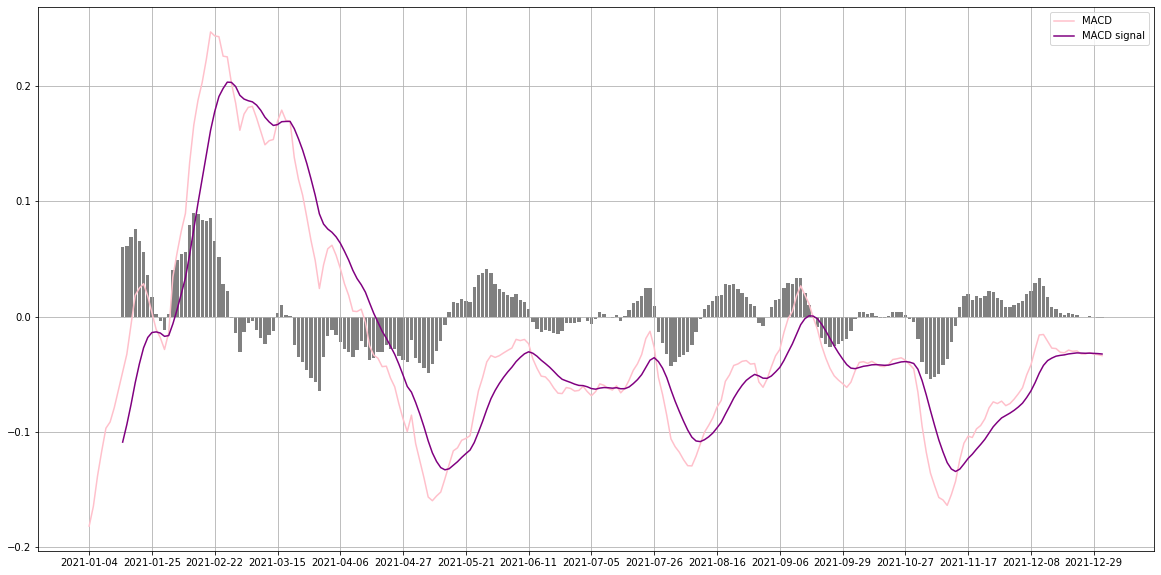

In [ ]:
df_test = test(df_sh600000, 12, 26, 'EMA')
buying_points = np.where(df_test['position_EMA'] == 1.0)[0]
selling_points = np.where(df_test['position_EMA'] == -1.0)[0]
df_test['MACD'], df_test['MACD signal'] = MACD(np.array(df_test['12_EMA']),np.array(df_test['26_EMA']))
df_test['MACD histogram'] = df_test['MACD'] - df_test['MACD signal']
res = BackTest('EMA + MACD', strategy, df_test, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df_test, step_date = 15)
plot_MACD(df_test, step_date = 15)

Profitability is lost (or absent altogether) compared to just the EMA Crossover, but drawdowns are falling.

# Results for other stocks

**Our final strategy**: *EMA Crossover (fast=12, slow=26) + risk management*

Let's see what results the strategy will show for other stocks.

For example, the second stock (sh600004) has many strongly ascending and descending trends

train: 
sharpes: 0.21373793953528816
max_drawdowns: -0.6223005616248232
profitability: 0.02581744055906826
profitability/max_drawdowns: -0.04148709185101661


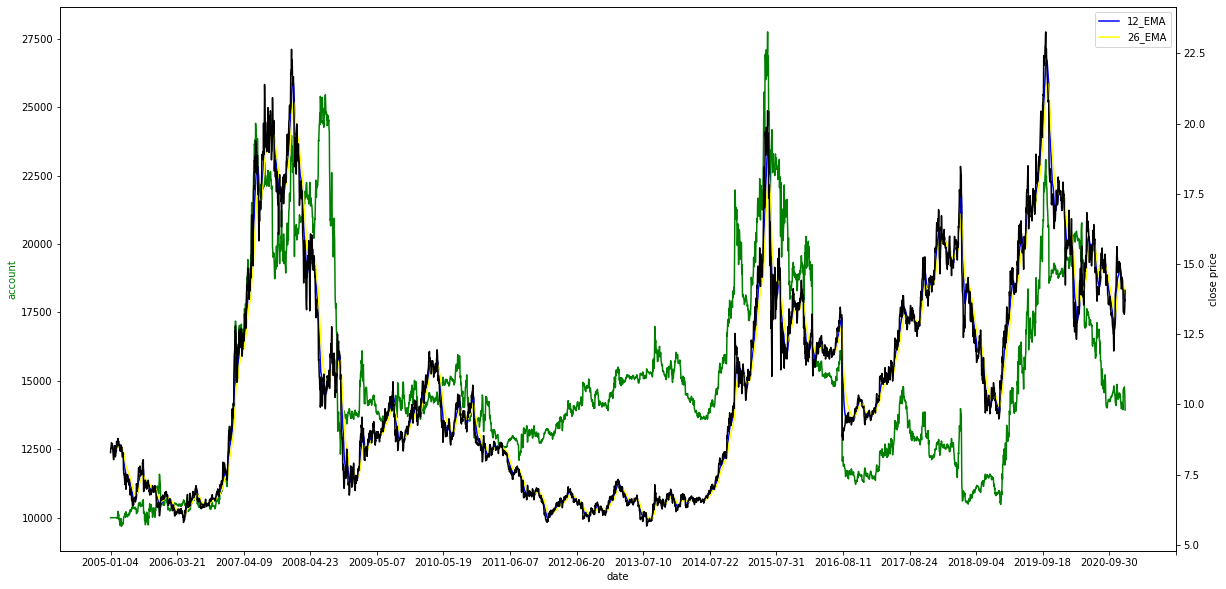

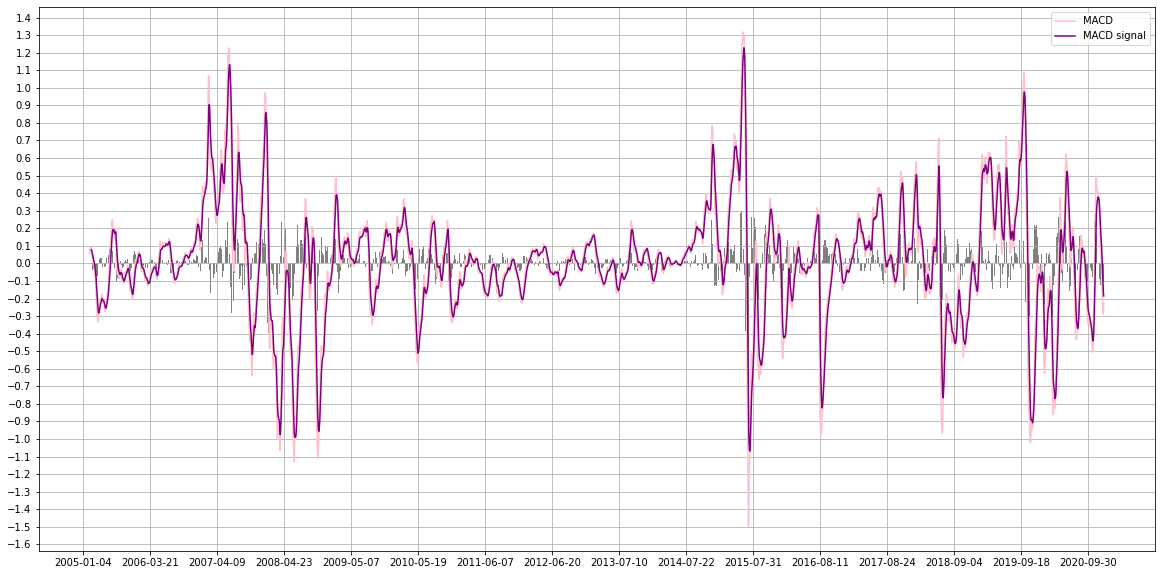

test: 
sharpes: 0.5059029308023812
max_drawdowns: -0.26156959210692377
profitability: 0.1075863703703702
profitability/max_drawdowns: -0.41131069366194256


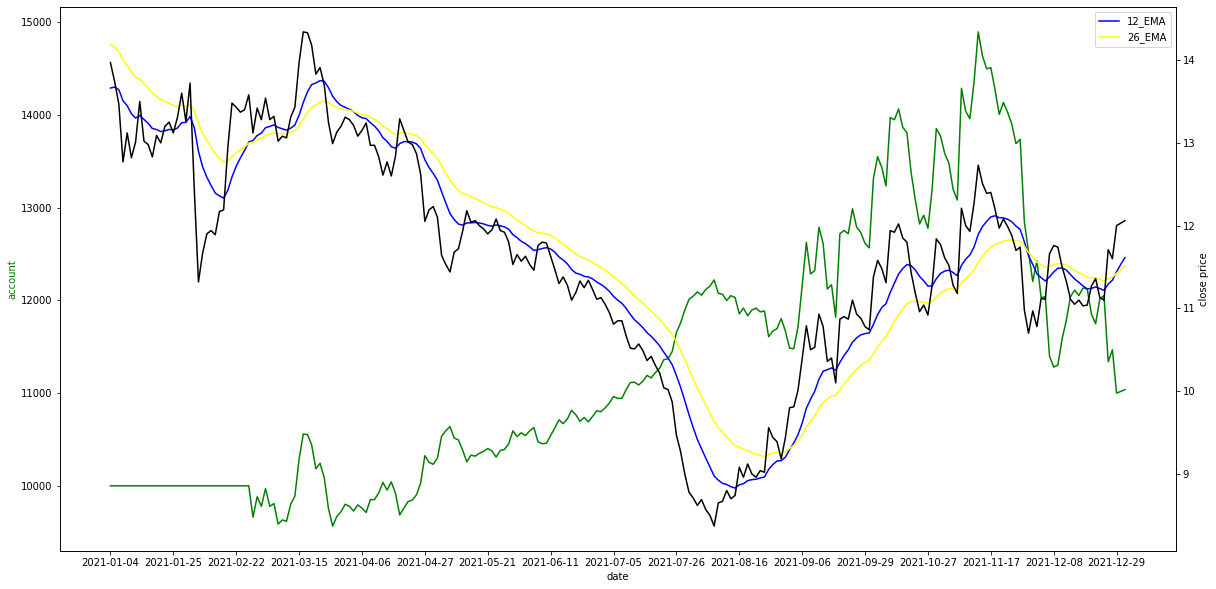

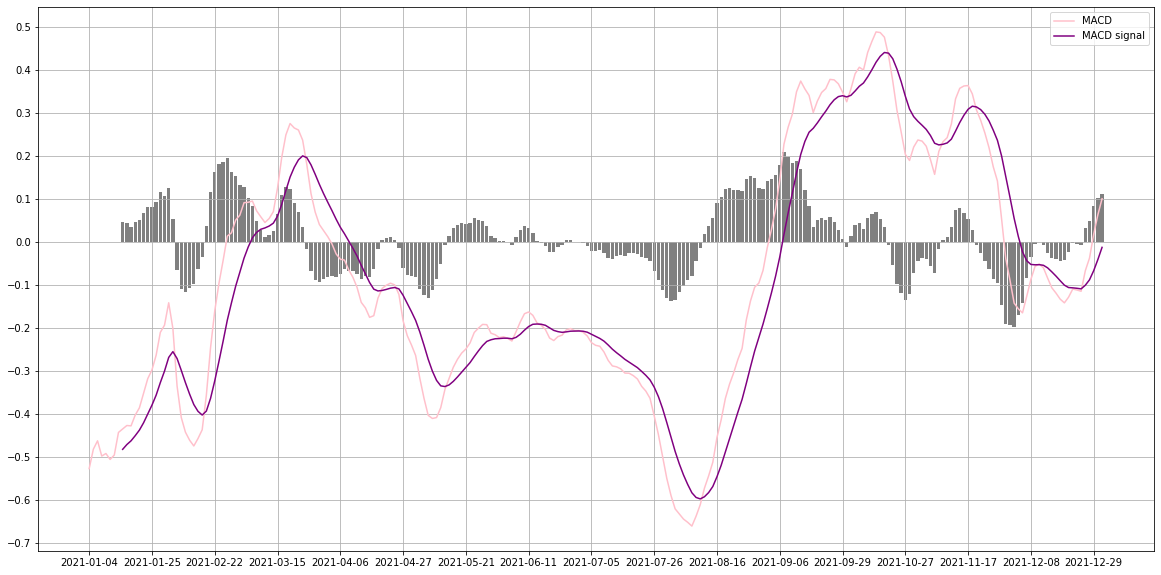

In [ ]:
df = data[data['ticker'] == 'sh600004'].drop(columns=['ticker'], axis=1)
df_train = train(df, 12, 26, 'EMA')
buying_points = np.where(df_train['position_EMA'] == 1.0)[0]
selling_points = np.where(df_train['position_EMA'] == -1.0)[0]
df_train['MACD'], df_train['MACD signal'] = MACD(np.array(df_train['12_EMA']),np.array(df_train['26_EMA']))
df_train['MACD histogram'] = df_train['MACD'] - df_train['MACD signal']
print('train: ')
res = BackTest('EMA + risk managment', strategy, df_train, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df_train, step_date = 252)
plot_MACD(df_train, step_date = 252)
print('test: ')
df_test = test(df, 12, 26, 'EMA')
buying_points = np.where(df_test['position_EMA'] == 1.0)[0]
selling_points = np.where(df_test['position_EMA'] == -1.0)[0]
df_test['MACD'], df_test['MACD signal'] = MACD(np.array(df_test['12_EMA']),np.array(df_test['26_EMA']))
df_test['MACD histogram'] = df_test['MACD'] - df_test['MACD signal']
res = BackTest('EMA + risk managment', strategy, df_test, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df_test, step_date = 15)
plot_MACD(df_test, step_date = 15)

On these data, the strategy caught the trends better, and therefore showed a better result.

The price change of the first 20 stocks is very similar in general, so the algorithm should continue to show good results on them.

Let's look at the results on the data where the price as a whole is growing: sh600009

train: 
sharpes: 0.6157007462474284
max_drawdowns: -0.299454533640205
profitability: 0.31612258571420626
profitability/max_drawdowns: -1.0556613782779722


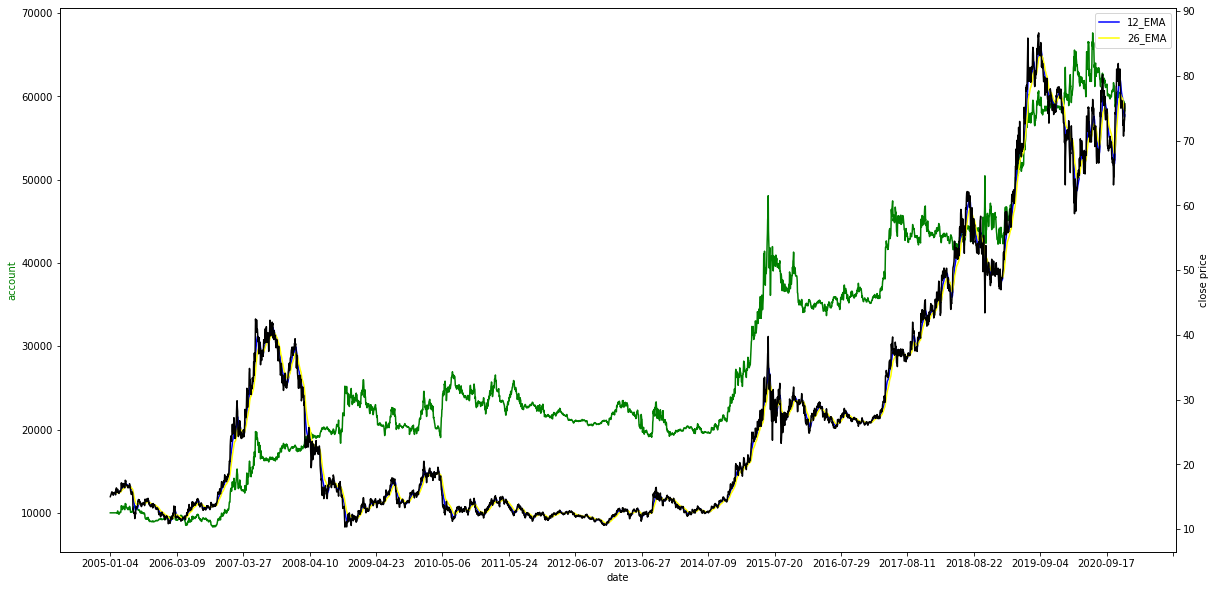

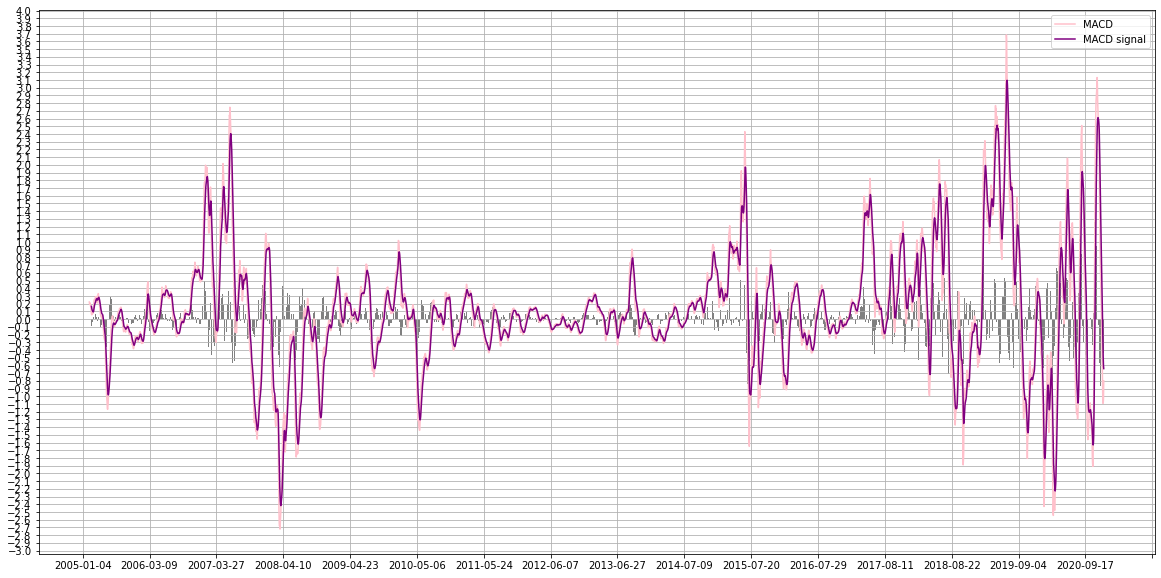

test: 
sharpes: 0.8564267460646291
max_drawdowns: -0.029799011581619572
profitability: 0.057579296137339184
profitability/max_drawdowns: -1.9322552353667617


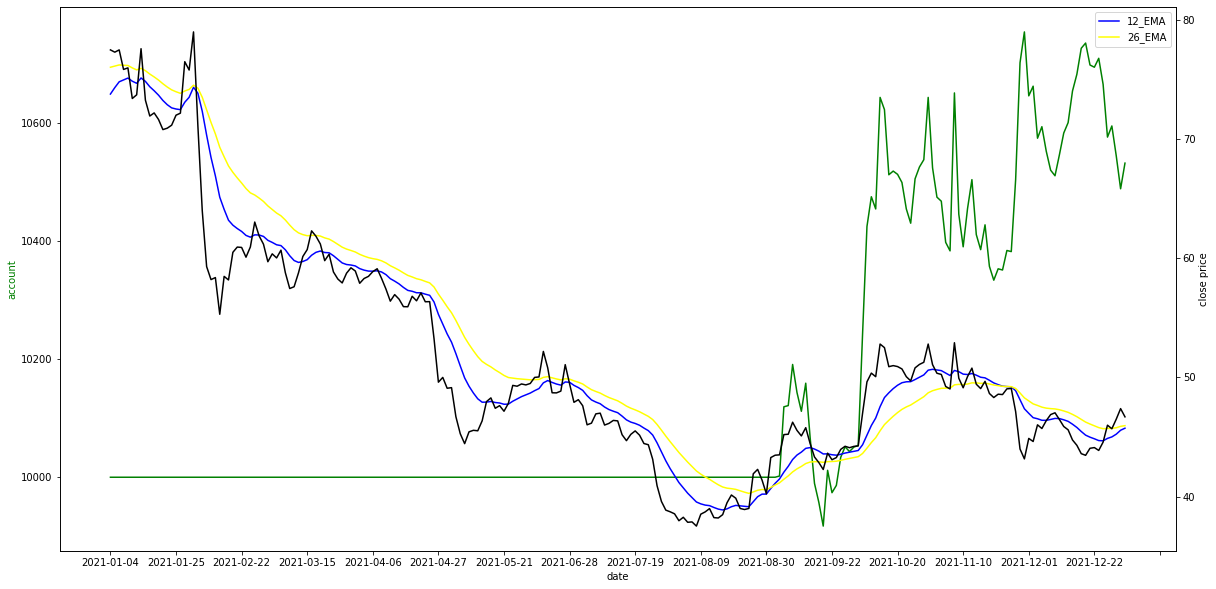

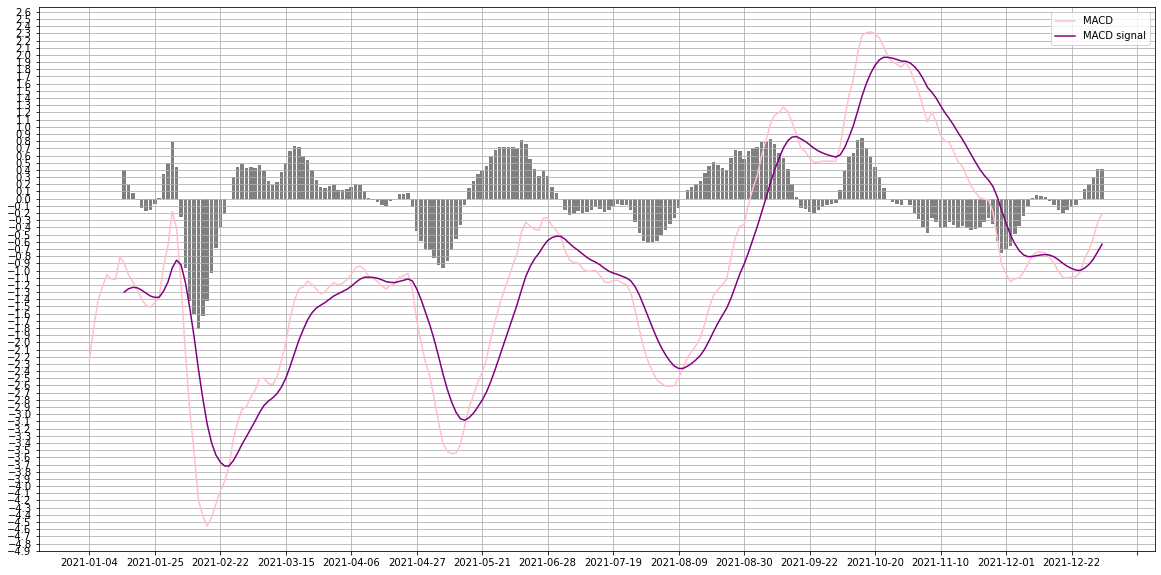

In [ ]:
df = data[data['ticker'] == 'sh600009'].drop(columns=['ticker'], axis=1)
df_train = train(df, 12, 26, 'EMA')
buying_points = np.where(df_train['position_EMA'] == 1.0)[0]
selling_points = np.where(df_train['position_EMA'] == -1.0)[0]
df_train['MACD'], df_train['MACD signal'] = MACD(np.array(df_train['12_EMA']),np.array(df_train['26_EMA']))
df_train['MACD histogram'] = df_train['MACD'] - df_train['MACD signal']
print('train: ')
res = BackTest('EMA + risk managment', strategy, df_train, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df_train, step_date = 252)
plot_MACD(df_train, step_date = 252)
print('test: ')
df_test = test(df, 12, 26, 'EMA')
buying_points = np.where(df_test['position_EMA'] == 1.0)[0]
selling_points = np.where(df_test['position_EMA'] == -1.0)[0]
df_test['MACD'], df_test['MACD signal'] = MACD(np.array(df_test['12_EMA']),np.array(df_test['26_EMA']))
df_test['MACD histogram'] = df_test['MACD'] - df_test['MACD signal']
res = BackTest('EMA + risk managment', strategy, df_test, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df_test, step_date = 15)
plot_MACD(df_test, step_date = 15)

Trends are well caught on the train, the strategy did not catch the trend on the test, which indicates slow parameters (for these data)

In general, the strategy copes with its task: it earns on trends and loses a little in the sideways.

# Final calculation

sharpes: -0.9967601575587087
max_drawdowns: -0.0732821492556247
profitability: -0.11910687804878163
profitability/max_drawdowns: 1.625319116027969


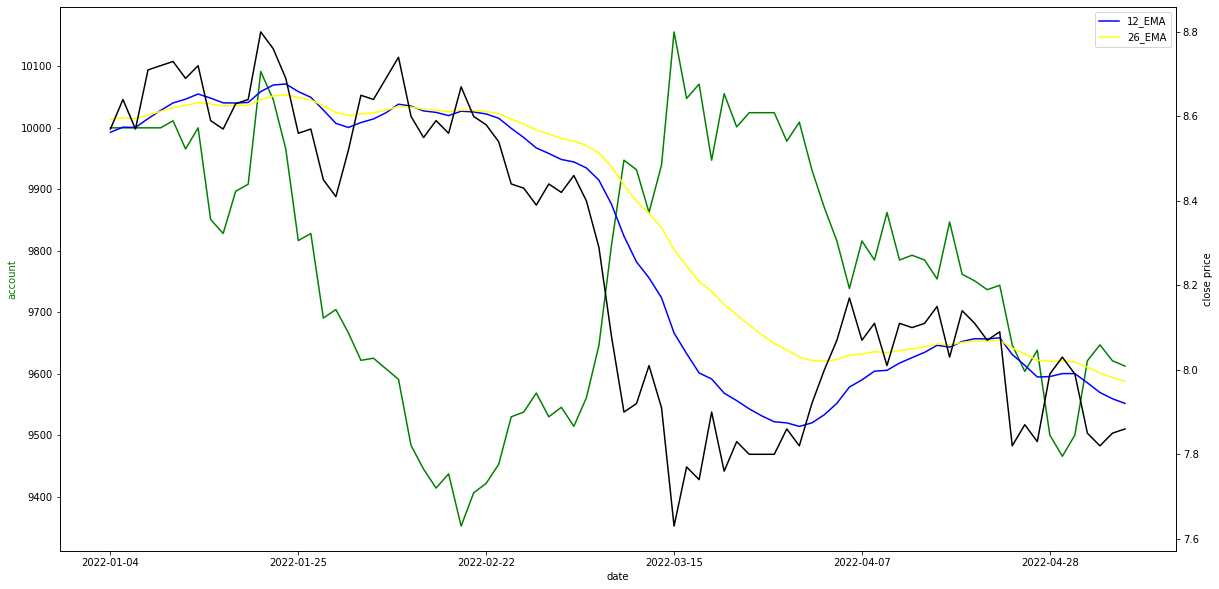

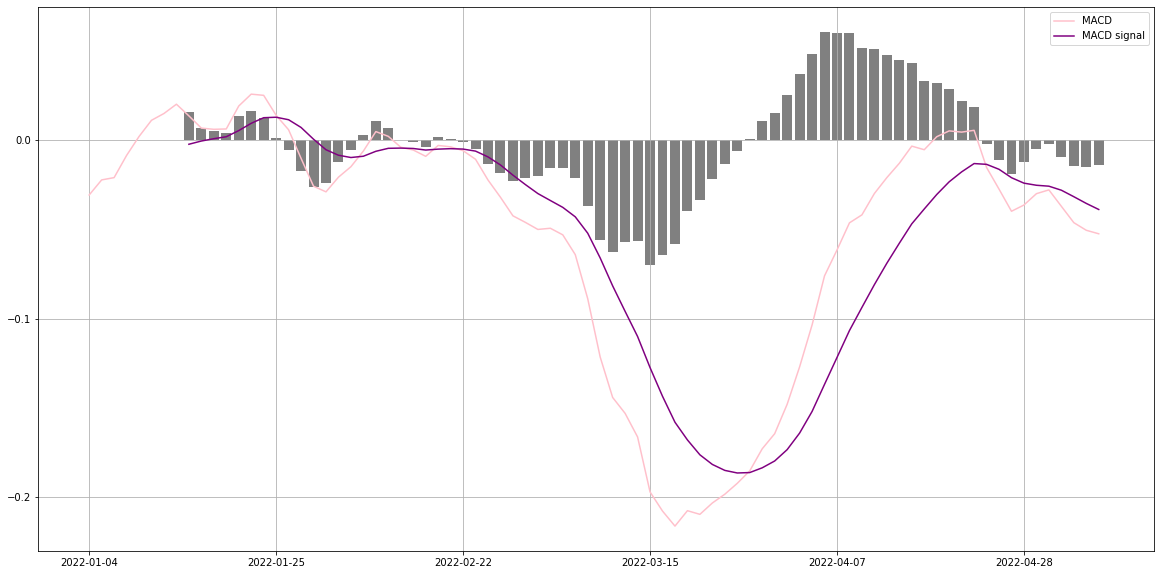

In [ ]:
df = df_sh600000[n_take_year(df_sh600000.index) == '2022']
first_2022 = np.where(n_take_year(np.array(df_sh600000.index)) == '2022')[0][0]
last_2022 = np.where(n_take_year(np.array(df_sh600000.index)) == '2022')[0][-1]
df['12_EMA'] = EMA(np.array(df_sh600000.close), 12, first_2022, last_2022 + 1)
df['26_EMA'] = EMA(np.array(df_sh600000.close), 26, first_2022, last_2022 + 1)
df['signal_EMA'] = np.where(df['12_EMA'] > df['26_EMA'], 1.0, 0.0)
df['position_EMA'] = df['signal_EMA'].diff()
buying_points = np.where(df['position_EMA'] == 1.0)[0]
selling_points = np.where(df['position_EMA'] == -1.0)[0]
df['MACD'], df['MACD signal'] = MACD(np.array(df['12_EMA']),np.array(df['26_EMA']))
df['MACD histogram'] = df['MACD'] - df['MACD signal']
res = BackTest('EMA + risk managment', strategy, df, buying_points, selling_points, info = True, risk_managment=True)[1]
plot_res(res, df, step_date = 15)
plot_MACD(df, step_date = 15)

These parameters do not keep up with the data